# Biliotecas e carregamento do Dataset original

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn import datasets
import re

**Carregamento do Dataset**

In [ ]:
df = pd.read_csv('marvelvsdc.csv',index_col=0)

In [ ]:
df

Movie         Year  \
ID                                                     
0                              Eternals        -2021   
1                                  Loki     (2021– )   
2     The Falcon and the Winter Soldier        -2021   
3                           WandaVision        -2021   
4               Spider-Man: No Way Home        -2021   
...                                 ...          ...   
1685           DC's Legends of Tomorrow     (2016– )   
1686                          Supergirl  (2015–2021)   
1687                          Supergirl  (2015–2021)   
1688                          Supergirl  (2015–2021)   
1689                          Supergirl  (2015–2021)   

                         Genre  RunTime  \
ID                                        
0       Action,Adventure,Drama        0   
1     Action,Adventure,Fantasy        0   
2       Action,Adventure,Drama   50 min   
3          Action,Comedy,Drama  350 min   
4      Action,Adventure,Sci-Fi        0   
...                        ...      ...   
1685    Action,Adventure,Drama   42 min   
1686    Action,Adventure,Drama   42 min   
1687    Action,Adventure,Drama   42 min   
1688    Action,Adventure,Drama   42 min   
1689    Action,Adventure,Drama   42 min   

                                            Description  IMDB_Score  
ID                                                                   
0     The saga of the Eternals, a race of immortal b...         0.0  
1         A new Marvel chapter with Loki at its center.         0.0  
2     Following the events of 'Avengers: Endgame,' S...         7.5  
3     Blends the style of classic sitcoms with the M...         8.1  
4          A continuation of Spider-Man: Far From Home.         0.0  
...                                                 ...         ...  
1685  Worlds lived, worlds died. Nothing will ever b...         8.5  
1686  In the wake of Lex Luthor's return, the show f...         8.3  
1687  Kara comes face to face with Red Daughter and ...         8.1  
1688  Kara and Lena head to Kaznia to hunt down Lex....         7.4  
1689  Supergirl must deal with the destructive after...         7.5  

[1690 rows x 6 columns]

In [ ]:
print("Quantidade de instâncias e atributos:", df.shape)

Quantidade de instâncias e atributos: (1690, 6)


# Transformação de atributos para numericos

**Transformação do atributo do ano, onde precisa da conversão porque tem formatos distintos, como "-2021", "2021-", "2021 Tv Movie", etc.**

In [ ]:
def limpar_ano_intervalo(valor):
    # Converte o valor para string
    valor = str(valor)

    # Remover parênteses, se existirem
    valor = re.sub(r'[()]', '', valor)

    # Expressões regulares para capturar os diferentes formatos:
    # 1. Intervalo de anos, como 2021-2022, 2015–2021
    if re.match(r'.*\d{4}[-–]\d{4}.*', valor):
        valor = re.sub(r'.*(\d{4})[-–]\d{4}.*', r'\1', valor)
    # 2. Caso tenha o ano isolado com traços, como -2013 ou 2013-
    elif re.match(r'^[^\d]*(\d{4})[-–].*', valor):
        valor = re.sub(r'^[^\d]*(\d{4})[-–].*', r'\1', valor)
    # 3. Caso o valor tenha algum texto depois do ano, como "1984 TV Movie"
    elif re.match(r'(\d{4})\s.*', valor):
        valor = re.sub(r'(\d{4})\s.*', r'\1', valor)
    # 4. Caso o valor tenha um sinal de menos antes do ano, como -2022 ou 2013-
    elif re.match(r'^[^\d]*(\d{4})$', valor):
        valor = re.sub(r'^[^\d]*(\d{4})$', r'\1', valor)
    # 5. Caso o valor já seja um ano isolado
    elif re.match(r'^\d{4}$', valor):
        pass  # Se já for um ano válido, nada precisa ser feito
    else:
        valor = '0'  # Caso não consiga extrair um ano, retorna 0

    # Garantir que o valor final seja um inteiro (se for numérico)
    return int(valor) if valor.isdigit() else 0

# Exemplo de aplicação em um DataFrame:
df['Year'] = df['Year'].apply(limpar_ano_intervalo)

**Transfomração do atributo nome do filme ou serie, aqui é atribuido um valor unico a produção para transformar em numerico, no momento é preferivel criar outra coluna chamada "Movie_numerico" para colocar esse valor unico do filme e manter a coluna "Movie" para melhor entendimento do Dataset**

In [ ]:
# biblioteca usada para converter variáveis categóricas em valores numéricos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Movie'] = le.fit_transform(df['Movie'])

# Exibindo o DataFrame com a conversão
print(df['Movie'])

ID
0       105
1       170
2       255
3       300
4       220
       ... 
1685     93
1686    227
1687    227
1688    227
1689    227
Name: Movie, Length: 1690, dtype: int64


**Transformação do atributo "Genre", aqui o atributo é atribuido a quantidade de gêneros em cada produção, foi criada o atributo "quantidade_generos" para serem adicionados a quantidades de gêneros e melhor entendimento do Dataset**

In [ ]:
def contar_generos(genre_string):
    if pd.isna(genre_string):  # Verifica se o valor é NaN
        return 0
    return len(genre_string.split(','))

# Aplicando a função ao DataFrame
df['Genre'] = df['Genre'].apply(contar_generos)

# Exibindo o DataFrame com as quantidades de gêneros
print(df['Genre'])

ID
0       3
1       3
2       3
3       3
4       3
       ..
1685    3
1686    3
1687    3
1688    3
1689    3
Name: Genre, Length: 1690, dtype: int64


**Transformação do atributos "RunTime" onde o tempo está em minutos, todas as instâncias tem o formato "120 min" que é retirado o " min".**

In [ ]:
# Função para remover a unidade 'min' e manter o valor numérico
def remover_min(tempo):
    # Converte para string, caso o valor seja um número inteiro
    tempo_str = str(tempo)
    # Remove ' min' do final e converte para número
    return int(tempo_str.replace(' min', ''))

# Aplicando a função ao DataFrame
df['RunTime'] = df['RunTime'].apply(remover_min)
print(df['RunTime'])

ID
0         0
1         0
2        50
3       350
4         0
       ... 
1685     42
1686     42
1687     42
1688     42
1689     42
Name: RunTime, Length: 1690, dtype: int64


**Transformação do atributo "Description" que é da descrição somente, é classificado para cada instância o total de caracteres da descrição. **

In [ ]:
df['Description'] = df['Description'].apply(lambda x: len(str(x)))
print(df['Description'])


ID
0       112
1        45
2       174
3       200
4        44
       ... 
1685     57
1686    180
1687     79
1688    226
1689    152
Name: Description, Length: 1690, dtype: int64


Mostrando o CSV atualizado

In [ ]:
df.head()

Movie  Year  Genre  RunTime  Description  IMDB_Score
ID                                                      
0     105  2021      3        0          112         0.0
1     170  2021      3        0           45         0.0
2     255  2021      3       50          174         7.5
3     300  2021      3      350          200         8.1
4     220  2021      3        0           44         0.0

# Calculos

Média

In [ ]:
# Função para calcular a média
def calcular_media(valores):
    return sum(valores) / len(valores)

print("Média do IMDB:", calcular_media(atributo_objetivo))
print("Média do ano:", calcular_media(ano))
print("Média da quantidade de genero:", calcular_media(genero))
print("Média do tempo:", calcular_media(tempo))
print("Média da descrição:", calcular_media(descricao))

Média do IMDB: 6.877337278106514
Média do ano: 1963.7585798816567
Média da quantidade de genero: 2.8857988165680473
Média do tempo: 34.12485207100592
Média da descrição: 138.5396449704142


Mediana

In [ ]:
import math

# Função para calcular a mediana
def calcular_mediana(valores):
    valores_ordenados = sorted(valores)
    n = len(valores)
    meio = n // 2
    if n % 2 == 0:
        return (valores_ordenados[meio - 1] + valores_ordenados[meio]) / 2
    else:
        return valores_ordenados[meio]

print("Mediana do IMDB:", calcular_mediana(atributo_objetivo))
print("Mediana do ano:", calcular_mediana(ano))
print("Mediana da quantidade de genero:", calcular_mediana(genero))
print("Mediana do tempo:", calcular_mediana(tempo))
print("Mediana da descrição:", calcular_mediana(descricao))


Mediana do IMDB: 7.8
Mediana do ano: 2008.0
Mediana da quantidade de genero: 3.0
Mediana do tempo: 30.0
Mediana da descrição: 136.0


variância

In [ ]:
def calcular_varianca(desvios):
  varianca = sum([x**2 for x in desvios]) / (len(desvios) - 1)
  return varianca

print("Variância do IMDB:", calcular_varianca(calcular_desvios(atributo_objetivo, calcular_media(atributo_objetivo))))
print("Variância do ano:", calcular_varianca(calcular_desvios(ano, calcular_media(ano))))
print("Variância da quantidade de genero:", calcular_varianca(calcular_desvios(genero, calcular_media(genero))))
print("Variância do tempo:", calcular_varianca(calcular_desvios(tempo, calcular_media(tempo))))
print("Variância da descrição:", calcular_varianca(calcular_desvios(descricao, calcular_media(descricao))))

Variância do IMDB: 7.2391367778279525
Variância do ano: 86442.76820638674
Variância da quantidade de genero: 0.18292431710931695
Variância do tempo: 1045.43200486266
Variância da descrição: 4432.844194071643


Desvios

In [ ]:
# Função para calcular os desvios
def calcular_desvios(dados, media):
    return [x - media for x in dados]

print("Desvios do IMDB:", calcular_desvios(atributo_objetivo, calcular_media(atributo_objetivo)))
print("Desvios do ano:", calcular_desvios(ano, calcular_media(ano)))
print("Desvios da quantidade de genero:", calcular_desvios(genero, calcular_media(genero)))
print("Desvios do tempo:", calcular_desvios(tempo, calcular_media(tempo)))
print("Desvios da descrição:", calcular_desvios(descricao, calcular_media(descricao)))

Desvios do IMDB: [-6.877337278106514, -6.877337278106514, 0.6226627218934864, 1.222662721893486, -6.877337278106514, -6.877337278106514, 1.5226627218934867, 1.1226627218934864, -6.877337278106514, 0.6226627218934864, 1.0226627218934867, 1.5226627218934867, 0.4226627218934862, 0.022662721893486726, -6.877337278106514, 0.5226627218934867, 0.4226627218934862, 0.022662721893486726, 0.722662721893486, 0.12266272189348637, 1.0226627218934867, 0.9226627218934862, 1.1226627218934864, -6.877337278106514, -0.777337278106514, 0.6226627218934864, 0.4226627218934862, 0.8226627218934865, 0.22266272189348602, -6.877337278106514, -6.877337278106514, 0.022662721893486726, 0.12266272189348637, -0.6773372781065135, 0.12266272189348637, -0.17733727810651345, -6.877337278106514, -6.877337278106514, -6.877337278106514, -6.877337278106514, -0.07733727810651381, 0.12266272189348637, -1.277337278106514, -6.877337278106514, -6.877337278106514, -6.877337278106514, -6.877337278106514, -6.877337278106514, -6.87733

Desvio Padrão

In [ ]:
# Função para calcular o desvio padrão
def calcular_desvio_padrao(variancia):
    return variancia ** 0.5

print("Desvio padrão do IMDB:", calcular_desvio_padrao(calcular_variancia(atributo_objetivo, calcular_media(atributo_objetivo))))
print("Desvio padrão do ano:", calcular_desvio_padrao(calcular_variancia(ano, calcular_media(ano))))
print("Desvio padrão da quantidade de genero:", calcular_desvio_padrao(calcular_variancia(genero, calcular_media(genero))))
print("Desvio padrão do tempo:", calcular_desvio_padrao(calcular_variancia(tempo, calcular_media(tempo))))
print("Desvio padrão da descrição:", calcular_desvio_padrao(calcular_variancia(descricao, calcular_media(descricao))))

Desvio padrão do IMDB: 2.690564397636294
Desvio padrão do ano: 294.0115103297603
Desvio padrão da quantidade de genero: 0.4276965245466895
Desvio padrão do tempo: 32.333140968094334
Desvio padrão da descrição: 66.57960794471265


# Distribuição e Correlação

### Correlações

In [ ]:
atributo_objetivo = df['IMDB_Score'].to_list() # Nota IMDB
Nome = df['Movie'].to_list() # Nome de cada Produção
ano = df['Year'].to_list() # Ano de cada produção
genero = df['Genre'].to_list() # Gênero de cada produção
tempo = df['RunTime'].to_list() # Tempo de duração de cada produção
descricao = df['Description'].to_list() # Descrição de cada produção

Dataset Atualizado

In [ ]:
df

Movie  Year  Genre  RunTime  Description  IMDB_Score
ID                                                        
0       105  2021      3        0          112         0.0
1       170  2021      3        0           45         0.0
2       255  2021      3       50          174         7.5
3       300  2021      3      350          200         8.1
4       220  2021      3        0           44         0.0
...     ...   ...    ...      ...          ...         ...
1685     93  2016      3       42           57         8.5
1686    227  2015      3       42          180         8.3
1687    227  2015      3       42           79         8.1
1688    227  2015      3       42          226         7.4
1689    227  2015      3       42          152         7.5

[1690 rows x 6 columns]

In [ ]:

def calcular_correlacao(x, y):
    # Verificar se a variância de qualquer variável é zero
    if len(set(x)) == 1 or len(set(y)) == 1:  # Todos os valores iguais
        return np.nan  # Correlação indefinida

    # Calcular a média de x e y
    media_x = calcular_media(x)
    media_y = calcular_media(y)

    # Calcular a variância de x e y (usando (n-1) para amostral)
    variancia_x = calcular_variancia(x, media_x)
    variancia_y = calcular_variancia(y, media_y)

    # Calcular o desvio padrão de x e y
    desvio_x = calcular_desvio_padrao(variancia_x)
    desvio_y = calcular_desvio_padrao(variancia_y)

    # Calcular a covariância (também dividindo por (n-1))
    covariancia = sum((x[i] - media_x) * (y[i] - media_y) for i in range(len(x))) / (len(x) - 1)  # Dividir por (n-1)
    # Verificar se o desvio padrão é zero antes de calcular a correlação
    if desvio_x == 0 or desvio_y == 0:
        return np.nan  # Retornar NaN (Not a Number) se o desvio padrão for zero
    else:
    # Calcular a correlação de Pearson
        return covariancia / (desvio_x * desvio_y)

Correlação entre as todos os atributos com o objetivo

In [ ]:
print("Correlação do atributo objetivo com o nome: ", calcular_correlacao(Nome, atributo_objetivo))
print("Correlação do atributo objetivo com o ano: ", calcular_correlacao(ano, atributo_objetivo))
print("Correlação do atributo objetivo com a quantidade de genero: ", calcular_correlacao(genero, atributo_objetivo))
print("Correlação do atributo objetivo com o tempo: ", calcular_correlacao(tempo, atributo_objetivo))
print("Correlação do atributo objetivo com a descrição: ", calcular_correlacao(descricao, atributo_objetivo))


Correlação do atributo objetivo com o nome:  0.043650045289882415
Correlação do atributo objetivo com o ano:  0.36461225759064286
Correlação do atributo objetivo com a quantidade de genero:  0.16609626645394826
Correlação do atributo objetivo com o tempo:  0.30729119032544416
Correlação do atributo objetivo com a descrição:  0.45327305651973304


**Correlação com o Nome das Produções: 0.0437**
*   A correlação é muito próxima de zero, o que indica que não há relação linear significativa entre o nome das produções e a nota IMDB.
Isso é esperado, pois o nome da produção não carrega uma relação lógica ou direta com a qualidade ou avaliação da obra.

**Correlação com o Ano de Lançamento: 0.3646**
*   Existe uma correlação moderada positiva entre o ano de lançamento e a nota IMDB.
Isso sugere que produções mais recentes tendem a ter notas ligeiramente mais altas, mas a relação não é forte. Isso pode refletir mudanças nos padrões de avaliação ao longo do tempo ou melhorias gerais na qualidade de produção.

**Correlação com a Quantidade de Gêneros: 0.1661**
*   Há uma correlação fraca positiva entre o número de gêneros de cada obra e a nota IMDB.
Isso indica que produções que abrangem mais gêneros podem ter notas ligeiramente mais altas, mas a relação não é muito relevante. Pode haver um limite onde adicionar mais gêneros não contribui para aumentar a qualidade percebida.

**Correlação com o Tempo (Duração): 0.3073**
*   Existe uma correlação moderada positiva entre a duração das obras e as notas IMDB.
Isso sugere que filmes ou produções mais longos tendem a receber notas um pouco mais altas, possivelmente porque produções mais longas podem ter mais espaço para desenvolver enredos complexos ou satisfazer o público.

**Correlação com o Comprimento da Descrição: 0.4533**
*   Há uma correlação moderada forte positiva entre o comprimento da descrição e a nota IMDB.
Isso sugere que produções com descrições mais longas (possivelmente mais detalhadas) tendem a ter notas mais altas. Isso pode refletir um esforço maior em produções que recebem mais atenção ou que são mais elaboradas, o que também pode impactar as avaliações.

















Heatmap

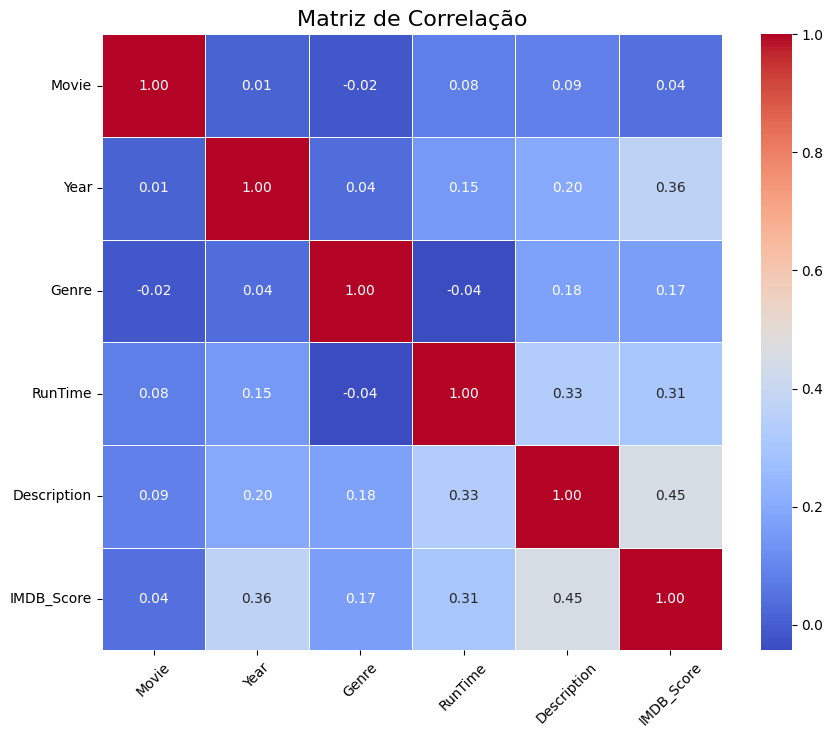

In [ ]:
import seaborn as sns

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurações do gráfico
plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Distribuição de dados

**Notas IMDB**

Histograma

Text(0, 0.5, 'Frequencia')

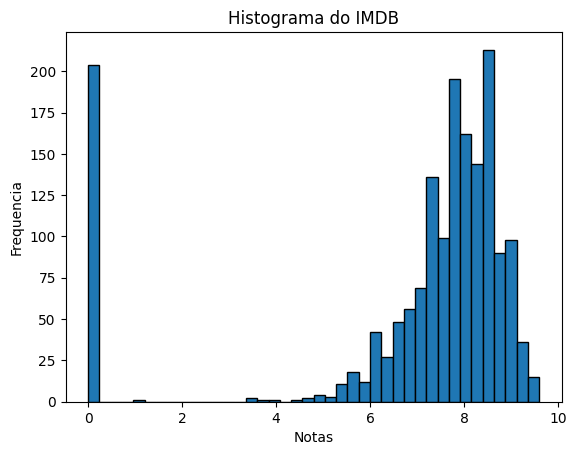

In [ ]:
plt.hist(atributo_objetivo, bins = 40, edgecolor = 'black')

plt.title('Histograma do IMDB')
plt.xlabel('Notas')
plt.ylabel('Frequencia')

 A distribuição das notas não é simétrica, com uma cauda mais longa à direita. Isso significa que há mais filmes com notas mais altas do que com notas mais baixas.


Boxplot

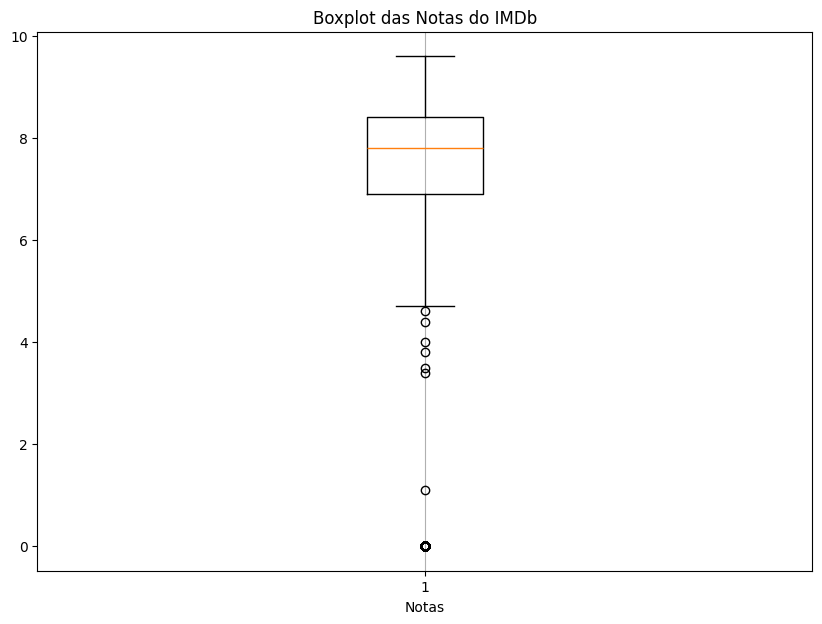

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(atributo_objetivo, vert=True)
plt.title('Boxplot das Notas do IMDb')
plt.xlabel('Notas')
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

**Nome**

Text(0, 0.5, 'Frequencia')

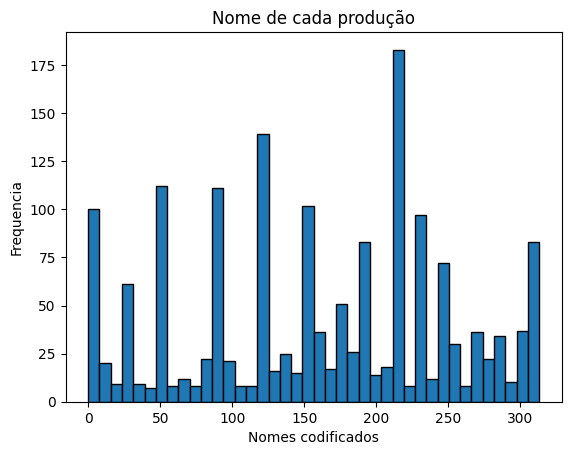

In [ ]:
plt.hist(Nome, bins = 40, edgecolor = 'black')

plt.title('Nome de cada produção')
plt.xlabel('Nomes codificados')
plt.ylabel('Frequencia')

O gráfico indica que a frequência com que cada produção aparece nos dados varia bastante. Algumas produções aparecem com muita frequência , enquanto outras aparecem poucas vezes e sendo caracterizado Assimetrica.

Boxplot

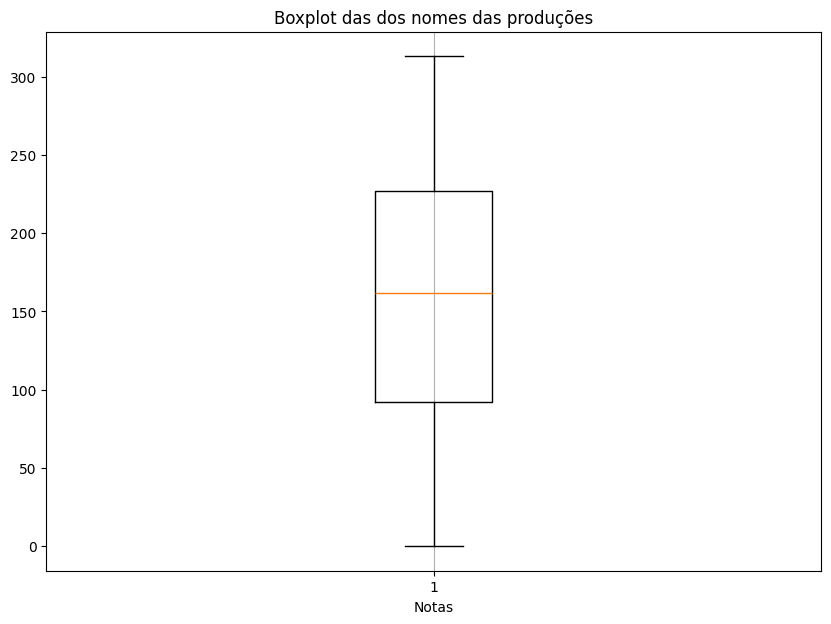

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(Nome, vert=True)
plt.title('Boxplot das dos nomes das produções')
plt.xlabel('Notas')
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

**Ano**

Text(0, 0.5, 'Frequencia')

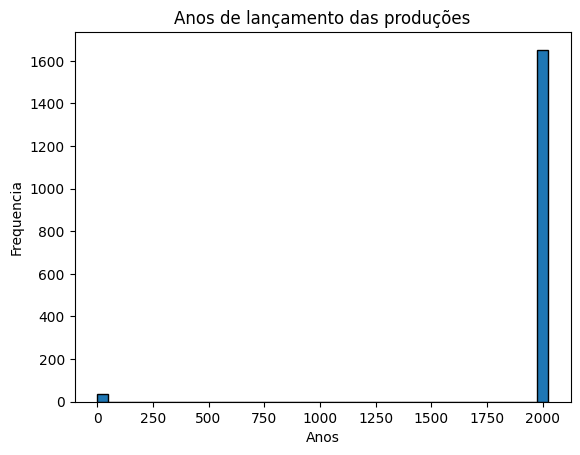

In [ ]:
plt.hist(ano, bins = 40, edgecolor = 'black')

plt.title('Anos de lançamento das produções')
plt.xlabel('Anos')
plt.ylabel('Frequencia')

A grande maioria das produções foi lançada nos últimos anos, especialmente em torno de 2000. Isso sugere um aumento significativo na produção de filmes ou outros tipos de conteúdo nessa época. É característico de Assimetrico.

Histograma

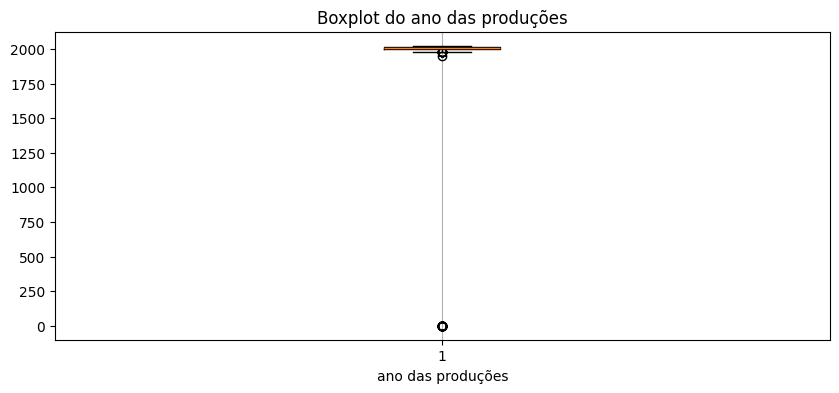

In [ ]:
plt.figure(figsize=(10, 4))
plt.boxplot(ano, vert=True)
plt.title('Boxplot do ano das produções')
plt.xlabel('ano das produções')
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

**Gêneros**

Text(0, 0.5, 'Frequencia')

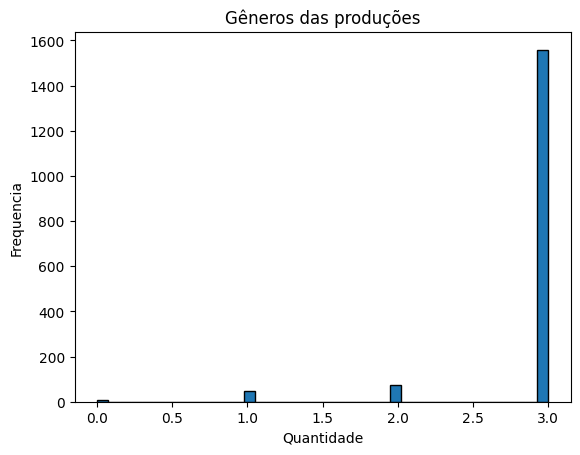

In [ ]:
plt.hist(genero, bins = 40, edgecolor = 'black')

plt.title('Gêneros das produções')
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')

A maioria das produções se enquadra em mais de um gênero. Isso sugere que a classificação dos conteúdos é predominantemente multipla, ou seja, cada produção é categorizada com mais de uma categoria genérica. É considerado Assimetrico.

Boxplot

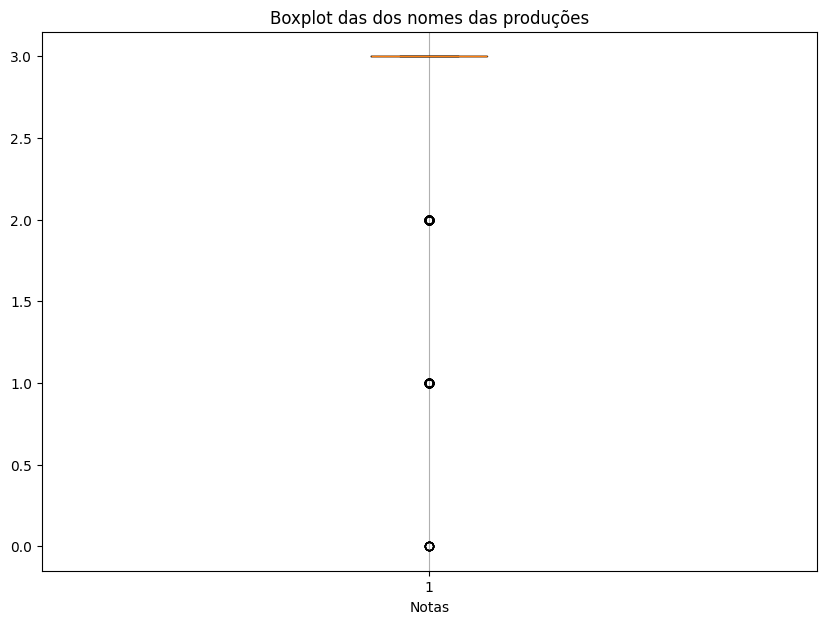

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(genero, vert=True)
plt.title('Boxplot das quantidades de gêneros das produções')
plt.xlabel('Notas')
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

**Tempo**

Text(0, 0.5, 'Frequencia')

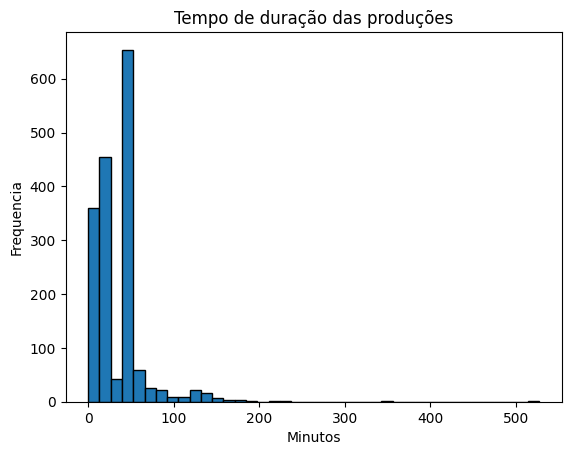

In [ ]:
plt.hist(tempo, bins = 40, edgecolor = 'black')

plt.title('Tempo de duração das produções')
plt.xlabel('Minutos')
plt.ylabel('Frequencia')

O histograma indica que a maioria das produções possui uma duração relativamente curta, concentrada nos primeiros minutos. Há uma queda acentuada na frequência conforme a duração aumenta, indicando que produções mais longas são menos comuns. Sendo Assimetrico.

Boxplot

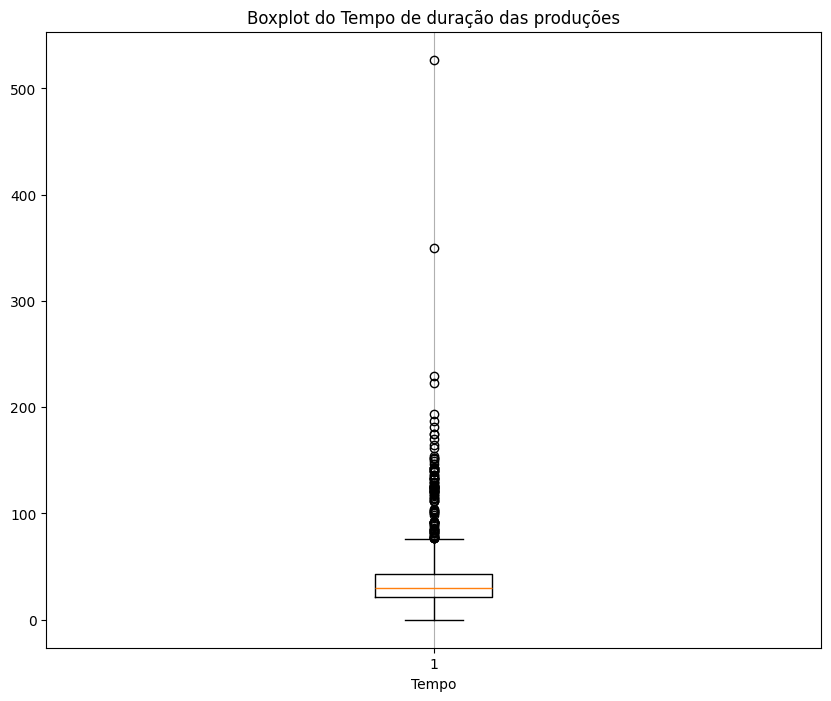

In [ ]:
plt.figure(figsize=(10, 8))
plt.boxplot(tempo, vert=True)
plt.title('Boxplot do Tempo de duração das produções')
plt.xlabel('Tempo')
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

**Descrição**

Text(0, 0.5, 'Frequencia')

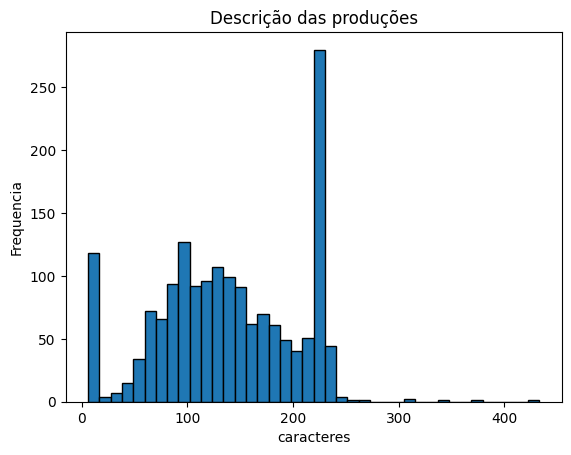

In [ ]:
plt.hist(descricao, bins = 40, edgecolor = 'black')

plt.title('Descrição das produções')
plt.xlabel('caracteres')
plt.ylabel('Frequencia')

O histograma indica que a grande maioria das produções possui uma descrição associada. Isso sugere que produções com descrições mais longas (possivelmente mais detalhadas) tendem a ter notas mais altas. Isso pode refletir um esforço maior em produções que recebem mais atenção ou que são mais elaboradas, o que também pode impactar as avaliações.

Boxplot

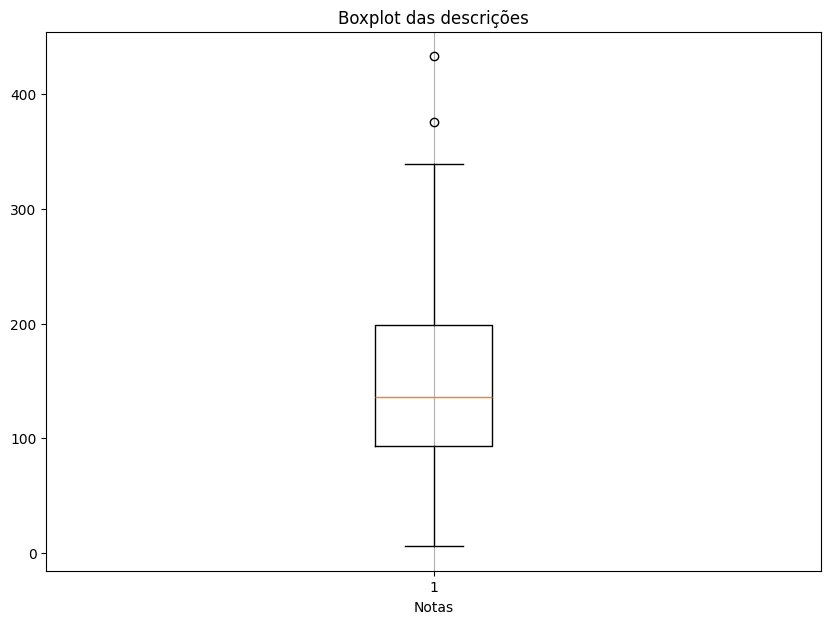

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(descricao, vert=True)
plt.title('Boxplot das descrições')
plt.xlabel('Notas')
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

# Outiliers

In [ ]:
def detect_outliers_iqr(data, column):
  # Calcula os quartis
    Q1 = data[column].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = data[column].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil

    # Define os limites inferior e superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifica os outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_list = outliers[column].tolist()  # Converte para uma lista

    # Remove os outliers do dataset original
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return outliers_list, data_cleaned

In [ ]:
# Detectando outliers
outliers_list, data_cleaned = detect_outliers_iqr(df, 'IMDB_Score')

print("Outliers detectados:")
print(outliers_list)

# print("\nDataset sem outliers:")
# print(data_cleaned)

Outliers detectados:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8, 0.0, 4.4, 3.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1, 0.0, 0.0, 3.5, 0.0, 0.0, 0.0, 0.0, 0.0, 4.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

# Modelos

## Modelo de aprendizagem de máquina

**Bibliotecas necessárias**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
#separando variaveis X e Y
x = df.drop('IMDB_Score', axis=1)
y = df['IMDB_Score']

In [ ]:
print(x)

      Movie  Year  Genre  RunTime  Description
ID                                            
0       105  2021      3        0            1
1       170  2021      3        0            1
2       255  2021      3       50            1
3       300  2021      3      350            1
4       220  2021      3        0            1
...     ...   ...    ...      ...          ...
1685     93  2016      3       42            1
1686    227  2015      3       42            1
1687    227  2015      3       42            1
1688    227  2015      3       42            1
1689    227  2015      3       42            1

[1690 rows x 5 columns]


In [ ]:
# Dividindo o dataset em treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Criando o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo com os dados de treinamento
model.fit(x_train, y_train)

# Realizando previsões nos dados de teste
y_pred = model.predict(x_test)

In [ ]:
# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)

# Exibindo o resultado
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 1.8617932195414053


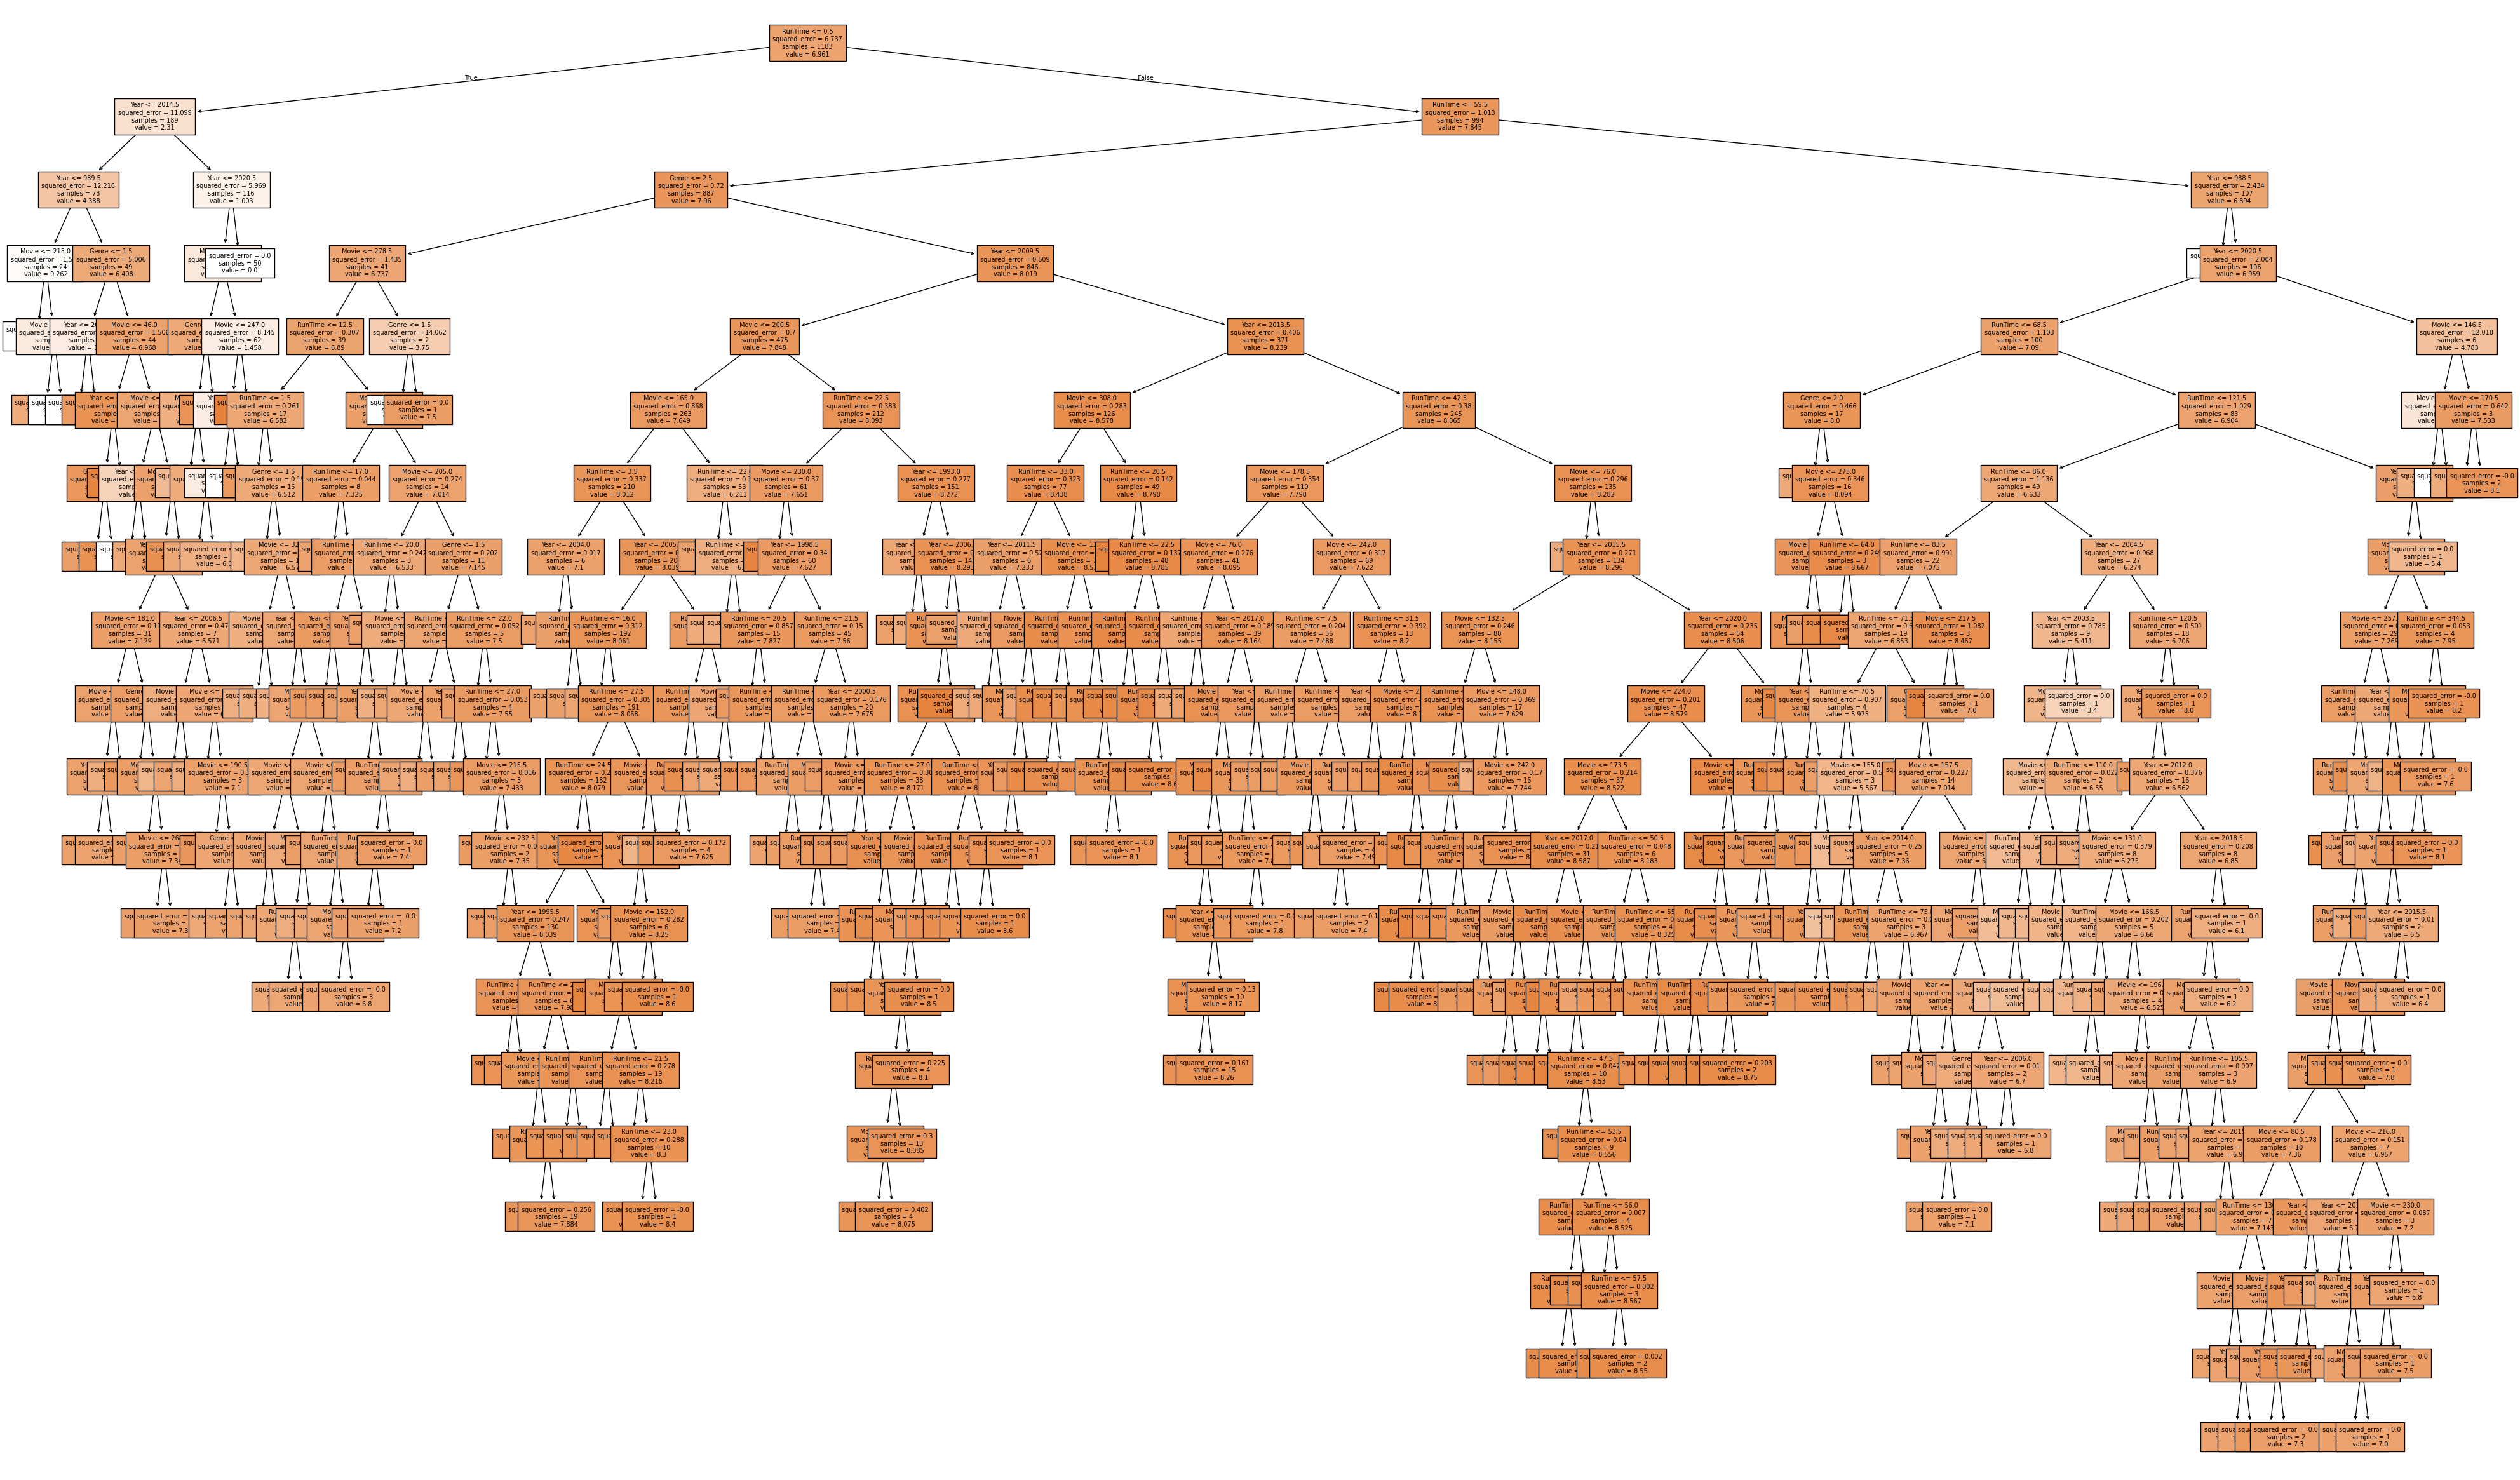

In [ ]:
plt.figure(figsize=(50, 30))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    #label='none',  # Remove os rótulos dos nós
    impurity=True,  # Remove a informação de impureza
#    proportion=False  # Remove proporções
    fontsize=7
)
plt.show()

## Modelo de aprendizagem de máquina com 50% de redução

**Bibliotecas necessárias**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
#separando variaveis X e Y
x = df.drop('IMDB_Score', axis=1)
y = df['IMDB_Score']

In [ ]:
print(x)

      Movie  Year  Genre  RunTime  Description
ID                                            
0       105  2021      3        0            1
1       170  2021      3        0            1
2       255  2021      3       50            1
3       300  2021      3      350            1
4       220  2021      3        0            1
...     ...   ...    ...      ...          ...
1685     93  2016      3       42            1
1686    227  2015      3       42            1
1687    227  2015      3       42            1
1688    227  2015      3       42            1
1689    227  2015      3       42            1

[1690 rows x 5 columns]


In [ ]:
# Dividindo o dataset em treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Criando o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo com os dados de treinamento
model.fit(x_train, y_train)

# Realizando previsões nos dados de teste
y_pred = model.predict(x_test)

Profundidade original: 19
Nova profundidade (50% da original): 9
MSE: 1.8600455882734481
R²: 0.7770077699725204


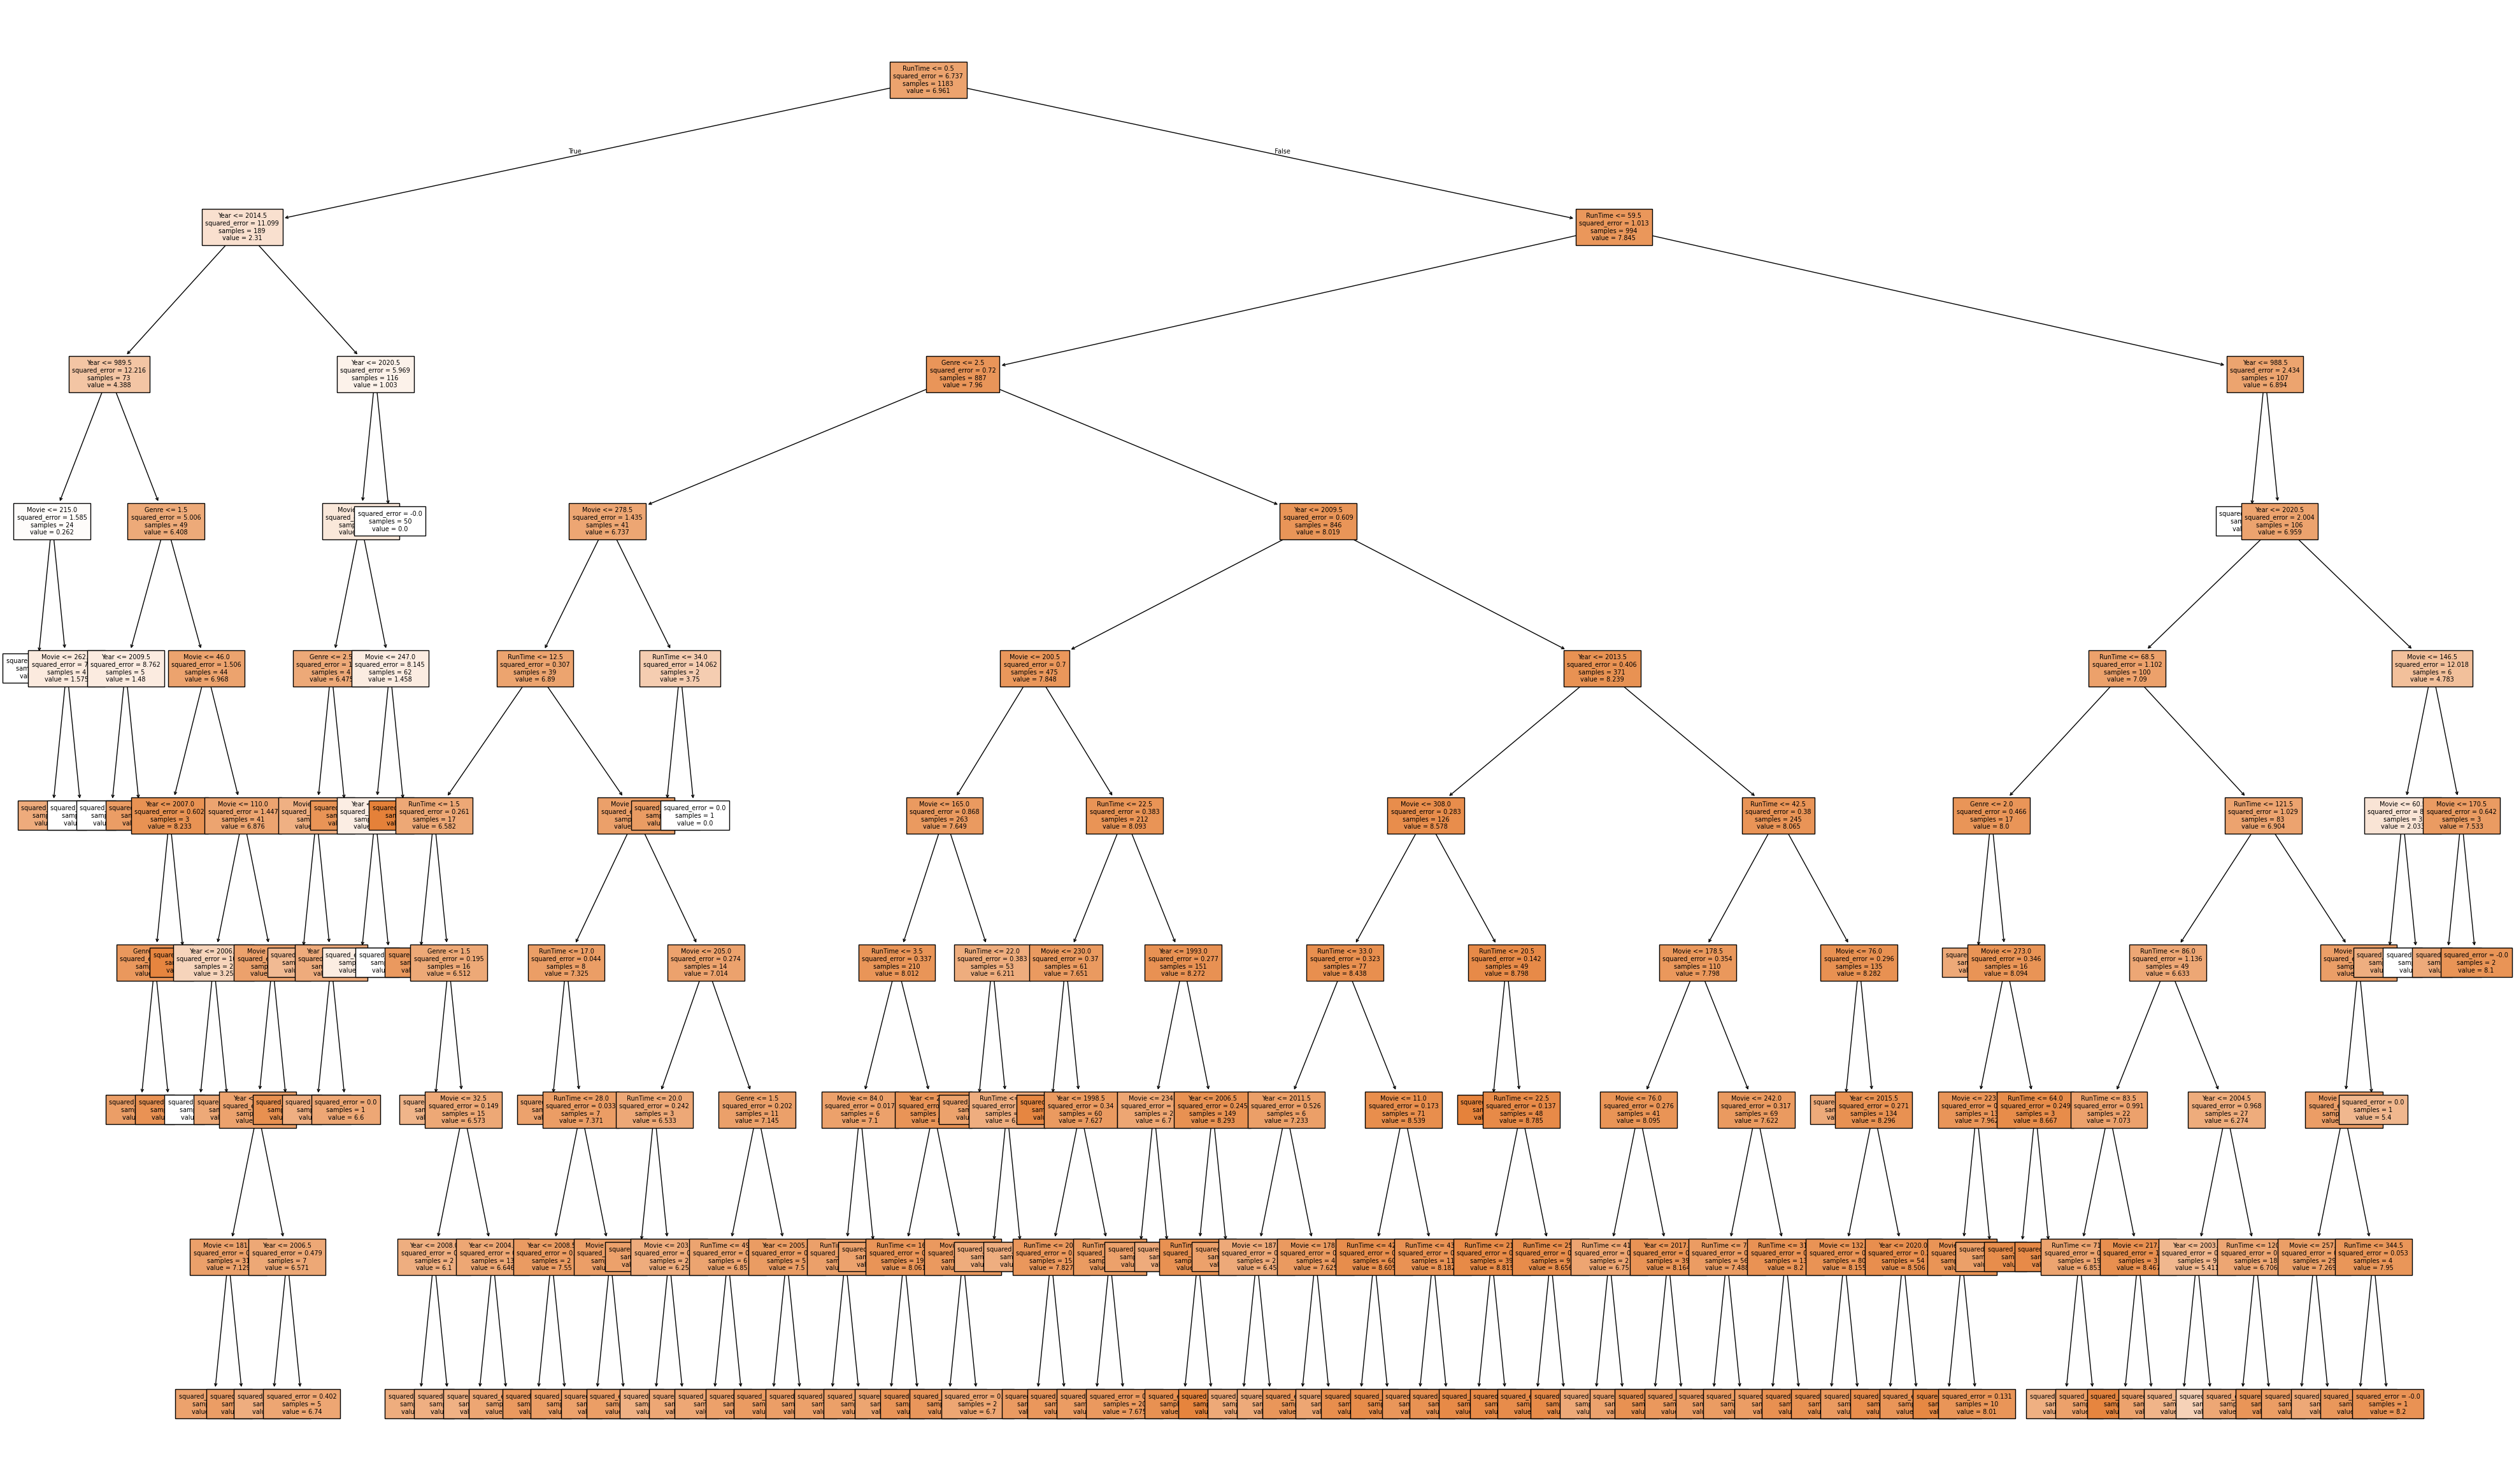

In [ ]:
# Calculando a profundidade da árvore original
original_depth = model.get_depth()
print(f"Profundidade original: {original_depth}")

# Calculando a nova profundidade (50% da original)
new_depth = int(original_depth / 2)  # Convertendo para inteiro
print(f"Nova profundidade (50% da original): {new_depth}")

# Criando e treinando o modelo com a nova profundidade
reduced_model = DecisionTreeRegressor(max_depth=new_depth, random_state=42)
reduced_model.fit(x_train, y_train)

# Realizando previsões com o modelo de profundidade reduzida
y_pred = reduced_model.predict(x_test)

# Calculando o MSE e R² para o modelo de profundidade reduzida
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

# plote da árvore reduzida
plt.figure(figsize=(50, 30))
plot_tree(
    reduced_model,
    feature_names=x.columns,  # Certifique-se de que 'x' seja um DataFrame
    class_names=["baixo", "médio", "alto"],  # Nomes das classes discretizadas
    filled=True,
    fontsize=7
)
plt.show()

# Métricas


*   Erro Absoluto Médio (MAE): Mede a média das diferenças absolutas entre os valores previstos e os reais. Quanto menor, melhor.

*   Erro Quadrático Médio (MSE): Mede a média dos quadrados das diferenças entre os valores previstos e reais. Quanto menor melhor, ou seja, quanto menor o MSE, melhor o modelo.

*   Coeficiente de Determinação (R²): Mede a proporção da variância dos dados que é explicada pelo modelo. Vai de 0 a 1, sendo que 1 significa um modelo perfeito.






In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Lista de modelos para teste
models = {
    "Decision Tree": DecisionTreeRegressor(
          criterion = 'squared_error'
        , random_state = 42
        , max_depth = 10             # Limita a profundidade da árvore
        , min_samples_split = 5     # Número mínimo de amostras para dividir um nó
        , min_samples_leaf = 5       # Número mínimo de amostras para uma folha
        , max_features = 'sqrt'      # Utiliza a raiz quadrada das variáveis para a divisão
    )
    , "MLP Regressor": MLPRegressor(
          random_state = 42
        , max_iter = 100
        , activation = 'identity'
        , learning_rate_init = 0.01
        , hidden_layer_sizes = (10, 20, 15)
    )
    , "Random Forest": RandomForestRegressor(
          random_state=42
        , n_estimators=100         # Número de árvores
        , max_depth=10              # Limita a profundidade das árvores
    )
    , "Linear Regression": LinearRegression(
          fit_intercept=True         # Inclui o intercepto no modelo
    )
}

In [ ]:
# Dicionário para armazenar os resultados
results = {}

# Treinamento, predição e cálculo das métricas MAE, MSE e R²
for name, model in models.items():
    try:
        model.fit(x_train, y_train)  # Treinamento do modelo
        predictions = model.predict(x_test)  # Predições do modelo

        # Cálculo das métricas
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Armazenando os resultados no dicionário
        results[name] = {
            "model": model,
            #"mae": mae,
            "mse": mse,
            #"r2": r2,
            "predictions": predictions
        }

    except Exception as e:
        print(f"{name} - Error: {e}")

# Ordenar modelos pelo MSE
sorted_results = sorted(results.items(), key=lambda x: x[1]['mse'])

# Se desejar exibir o resultado dos modelos ordenados por MSE
for model_name, metrics in sorted_results:
    print(f"\nModelo: {model_name}")
    #print(f"MAE: {metrics['mae']:.4f}, MSE: {metrics['mse']:.4f}, R²: {metrics['r2']:.4f}")
    print(f"MSE: {metrics['mse']:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Modelo: Random Forest
MSE: 1.5970

Modelo: Decision Tree
MSE: 1.5988

Modelo: Linear Regression
MSE: 6.5218

Modelo: MLP Regressor
MSE: 7.1909


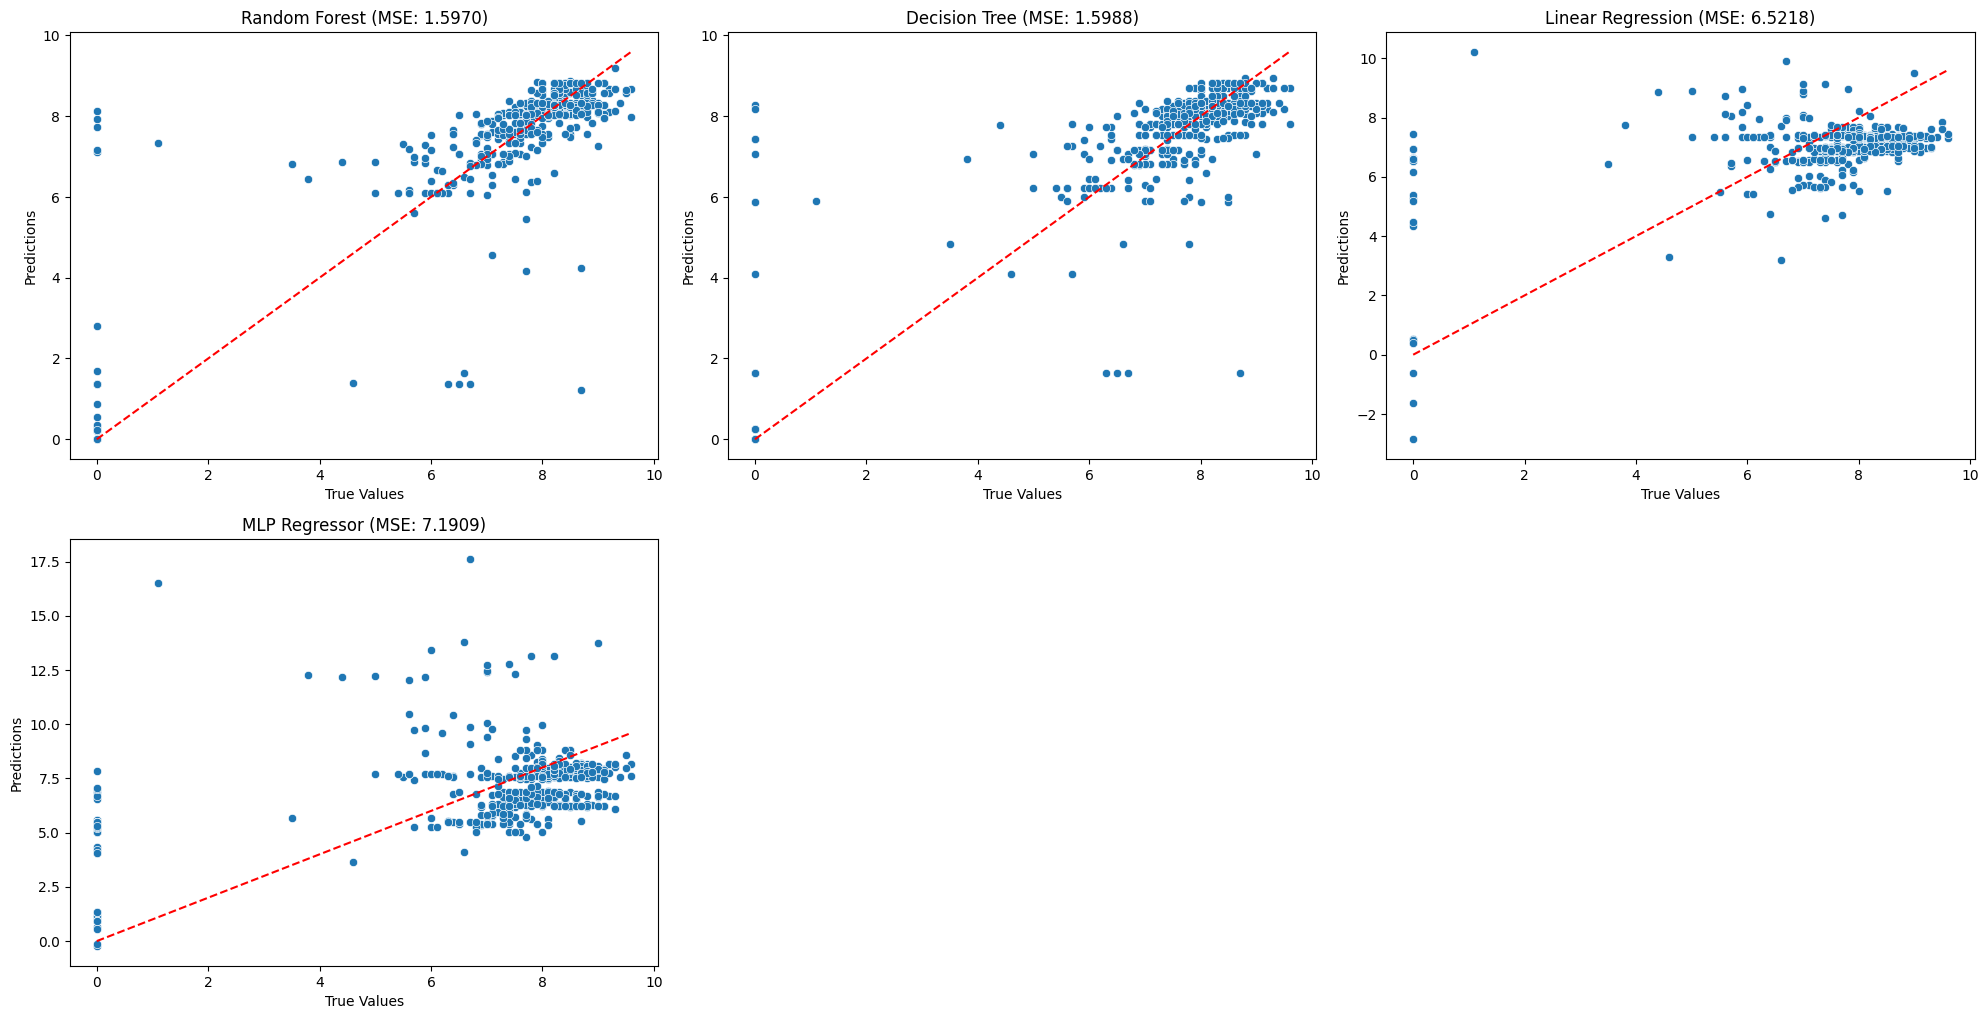

In [ ]:
# Gráficos scatter plot para cada modelo separadamente
plt.figure(figsize=(20, 20))
for i, (name, res) in enumerate(sorted_results, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=y_test, y=res['predictions'])
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"{name} (MSE: {res['mse']:.4f})")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Normalização

In [ ]:
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Dataframe original: ")
print(df)
print("Dataframe normalizado: ")
print(df_normalizado)

Dataframe original: 
      Movie  Year  Genre  RunTime  Description  IMDB_Score
ID                                                        
0       105  2021      3        0          112         0.0
1       170  2021      3        0           45         0.0
2       255  2021      3       50          174         7.5
3       300  2021      3      350          200         8.1
4       220  2021      3        0           44         0.0
...     ...   ...    ...      ...          ...         ...
1685     93  2016      3       42           57         8.5
1686    227  2015      3       42          180         8.3
1687    227  2015      3       42           79         8.1
1688    227  2015      3       42          226         7.4
1689    227  2015      3       42          152         7.5

[1690 rows x 6 columns]
Dataframe normalizado: 
         Movie      Year  Genre   RunTime  Description  IMDB_Score
0     0.335463  0.999011    1.0  0.000000     0.248244    0.000000
1     0.543131  0.999011    1

In [ ]:
#separando variaveis X e Y
x = df_normalizado.drop('IMDB_Score', axis=1)
y = df_normalizado['IMDB_Score']

# Dividindo o dataset em treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Criando o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo com os dados de treinamento
model.fit(x_train, y_train)

# Realizando previsões nos dados de teste
y_pred = model.predict(x_test)

In [ ]:
# Lista de modelos para teste
models = {
    "Decision Tree": DecisionTreeRegressor(
          criterion = 'squared_error'
        , random_state = 42
        , max_depth = 10             # Limita a profundidade da árvore
        , min_samples_split = 5     # Número mínimo de amostras para dividir um nó
        , min_samples_leaf = 5       # Número mínimo de amostras para uma folha
        , max_features = 'sqrt'      # Utiliza a raiz quadrada das variáveis para a divisão
    )
    , "MLP Regressor": MLPRegressor(
          random_state = 42
        , max_iter = 100
        , activation = 'identity'
        , learning_rate_init = 0.01
        , hidden_layer_sizes = (10, 20, 15)
    )
    , "Random Forest": RandomForestRegressor(
          random_state=42
        , n_estimators=100         # Número de árvores
        , max_depth=10              # Limita a profundidade das árvores
    )
    , "Linear Regression": LinearRegression(
          fit_intercept=True         # Inclui o intercepto no modelo
    )
}

In [ ]:
# Dicionário para armazenar os resultados
results = {}

# Treinamento, predição e cálculo das métricas MAE, MSE e R²
for name, model in models.items():
    try:
        model.fit(x_train, y_train)  # Treinamento do modelo
        predictions = model.predict(x_test)  # Predições do modelo

        # Cálculo das métricas
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Armazenando os resultados no dicionário
        results[name] = {
            "model": model,
            "mae": mae,
            "mse": mse,
            "r2": r2,
            "predictions": predictions
        }

    except Exception as e:
        print(f"{name} - Error: {e}")

# Ordenar modelos pelo MSE
sorted_results = sorted(results.items(), key=lambda x: x[1]['mse'])

# Se desejar exibir o resultado dos modelos ordenados por MSE
for model_name, metrics in sorted_results:
    print(f"\nModelo: {model_name}")
    print(f"MAE: {metrics['mae']:.4f}, MSE: {metrics['mse']:.4f}, R²: {metrics['r2']:.4f}")
    #print(f"MSE: {metrics['mse']:.4f}")


Modelo: Decision Tree
MAE: 0.0781, MSE: 0.0227, R²: 0.7494

Modelo: Random Forest
MAE: 0.0732, MSE: 0.0228, R²: 0.7482

Modelo: Linear Regression
MAE: 0.1761, MSE: 0.0633, R²: 0.3008

Modelo: MLP Regressor
MAE: 0.1727, MSE: 0.0644, R²: 0.2880


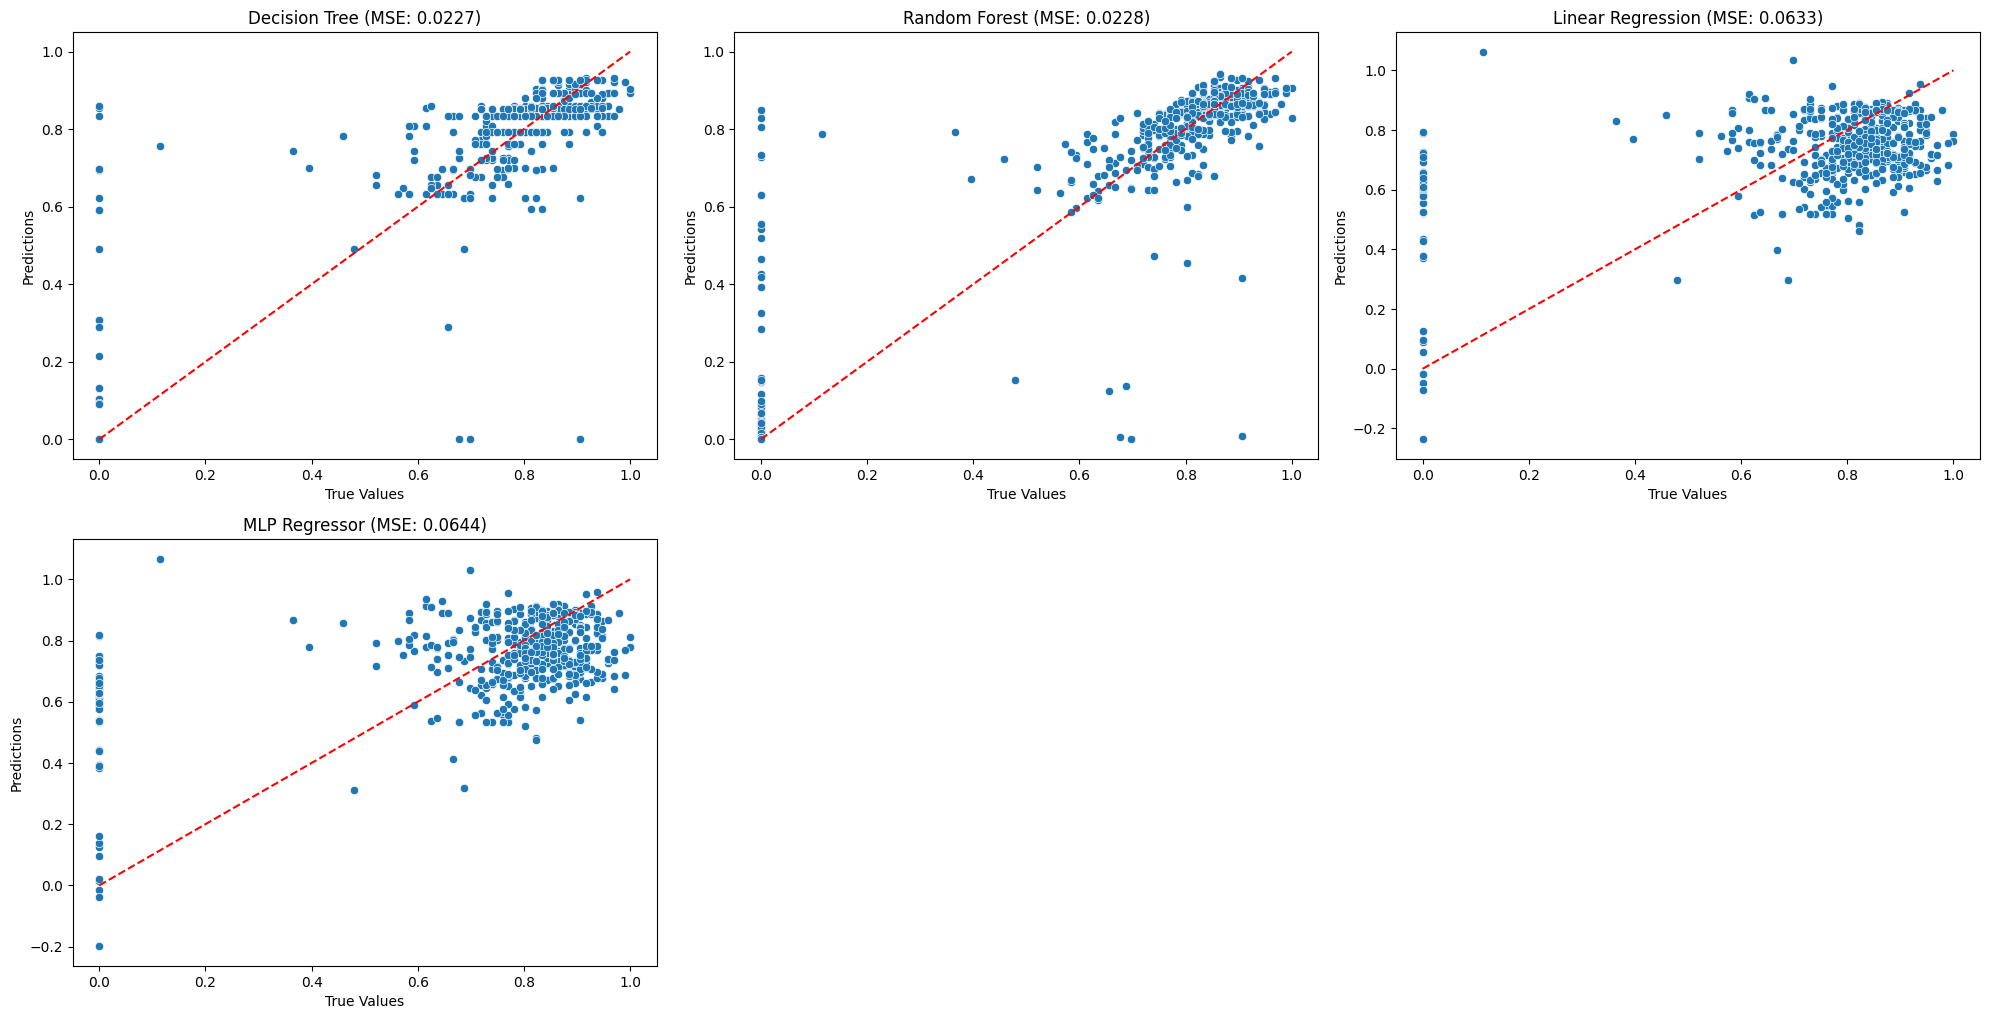

In [ ]:
# Gráficos scatter plot para cada modelo separadamente
plt.figure(figsize=(20, 20))
for i, (name, res) in enumerate(sorted_results, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=y_test, y=res['predictions'])
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"{name} (MSE: {res['mse']:.4f})")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

plt.tight_layout()
plt.show()